# Graded Challenge 5 Phase 1

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

Graded Challenge 5 was created to evaluate the concept of Anomaly Detection as follows:

- Able to understand the concept of Anomaly Detection using Scikit-Learn
- Able to prepare data for use in Anomaly Detection
- Able to implement Anomaly Detection on the given data

***Import libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import plotly.express as px
from plotly.offline import init_notebook_mode
from time import time
from warnings import filterwarnings
filterwarnings('ignore')

from time import time
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

***Data Loading***

In [2]:
#import data

df = pd.read_csv('creditcard.csv')

In [3]:
#view data

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
#view columns from dataset

cols = df.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#view summaries from dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


***Data Cleaning***

In [8]:
#check missing value from dataset

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in this dataset, so we can do further exploration without handling missing values

In [9]:
#check duplicated data

print('There are {} duplicated data on dataset'.format(df.duplicated().sum()))

There are 1081 duplicated data on dataset


In [10]:
#show duplicated data

duplicated_df = df[df.duplicated()]
duplicated_df.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
223,145.0,-2.419486,1.949346,0.552998,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,...,1.213390,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
1178,919.0,0.904289,-0.538055,0.396058,0.500680,-0.864473,-0.657199,0.027231,-0.029473,0.265447,...,-0.099460,-0.597579,-0.048666,0.551824,0.182934,0.402176,-0.081357,0.027252,158.00,0


In [11]:
#drop duplicated data from dataset

dfc = df.copy()
dfc.drop_duplicates(inplace=True)

In [12]:
dfc.duplicated().sum()

0

In [13]:
dfc.shape

(283726, 31)

In [14]:
#check outlier from distribution on dataset

print(round(df.describe().T))

           count     mean      std    min      25%      50%       75%  \
Time    284807.0  94814.0  47488.0    0.0  54202.0  84692.0  139320.0   
V1      284807.0      0.0      2.0  -56.0     -1.0      0.0       1.0   
V2      284807.0      0.0      2.0  -73.0     -1.0      0.0       1.0   
V3      284807.0     -0.0      2.0  -48.0     -1.0      0.0       1.0   
V4      284807.0      0.0      1.0   -6.0     -1.0     -0.0       1.0   
V5      284807.0      0.0      1.0 -114.0     -1.0     -0.0       1.0   
V6      284807.0      0.0      1.0  -26.0     -1.0     -0.0       0.0   
V7      284807.0     -0.0      1.0  -44.0     -1.0      0.0       1.0   
V8      284807.0      0.0      1.0  -73.0     -0.0      0.0       0.0   
V9      284807.0     -0.0      1.0  -13.0     -1.0     -0.0       1.0   
V10     284807.0      0.0      1.0  -25.0     -1.0     -0.0       0.0   
V11     284807.0      0.0      1.0   -5.0     -1.0     -0.0       1.0   
V12     284807.0     -0.0      1.0  -19.0     -0.0 

In [15]:
vcols = dfc.drop(['Time','Amount','Class'], axis=1).columns

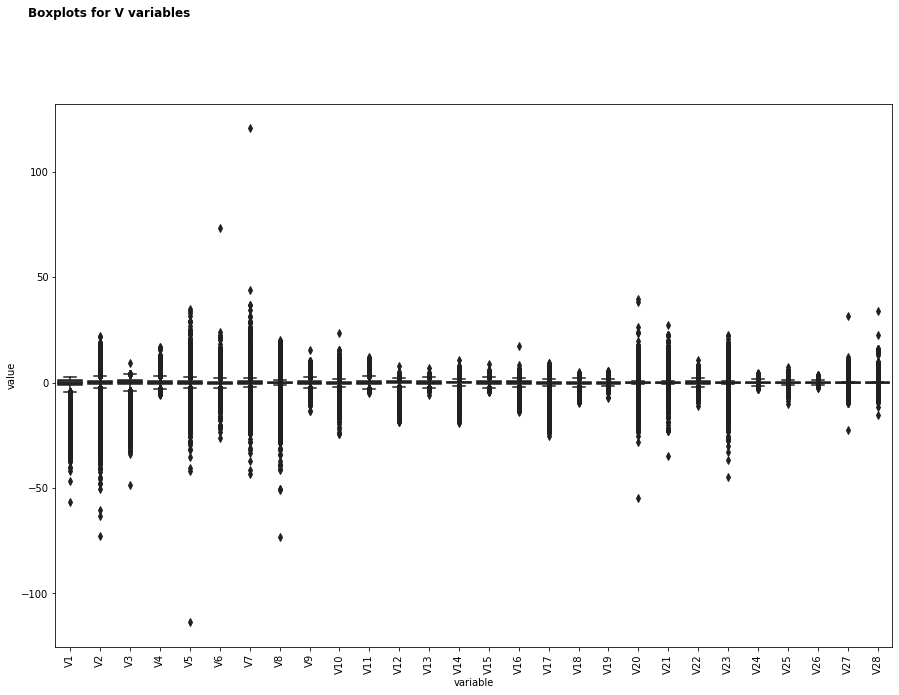

In [16]:
NumericData = dfc[[feature for feature in vcols if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for V variables", fontsize=12, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['#244247']*len(vcols))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

***Exploratory Data Analysis***

In [17]:
#show distribution target variable 

print('No Frauds', round(dfc['Class'].value_counts()[0]/len(dfc) * 100,2), '% of the dataset')
print('Frauds', round(dfc['Class'].value_counts()[1]/len(dfc) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

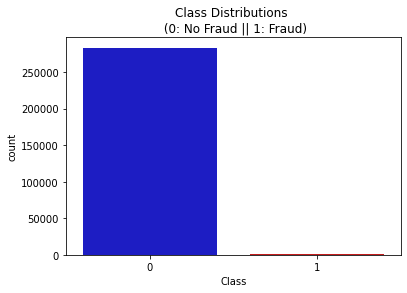

In [18]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=dfc, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

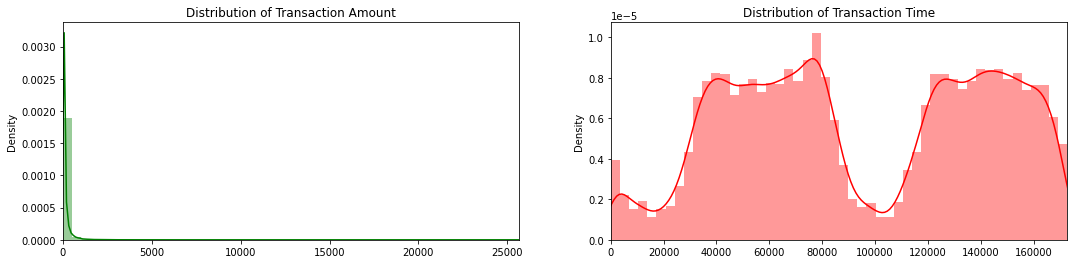

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dfc['Amount'].values
time_val = dfc['Time'].values

sns.distplot(amount_val, ax=ax[0], color='green')
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='red')
ax[1].set_title('Distribution of Transaction Time', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

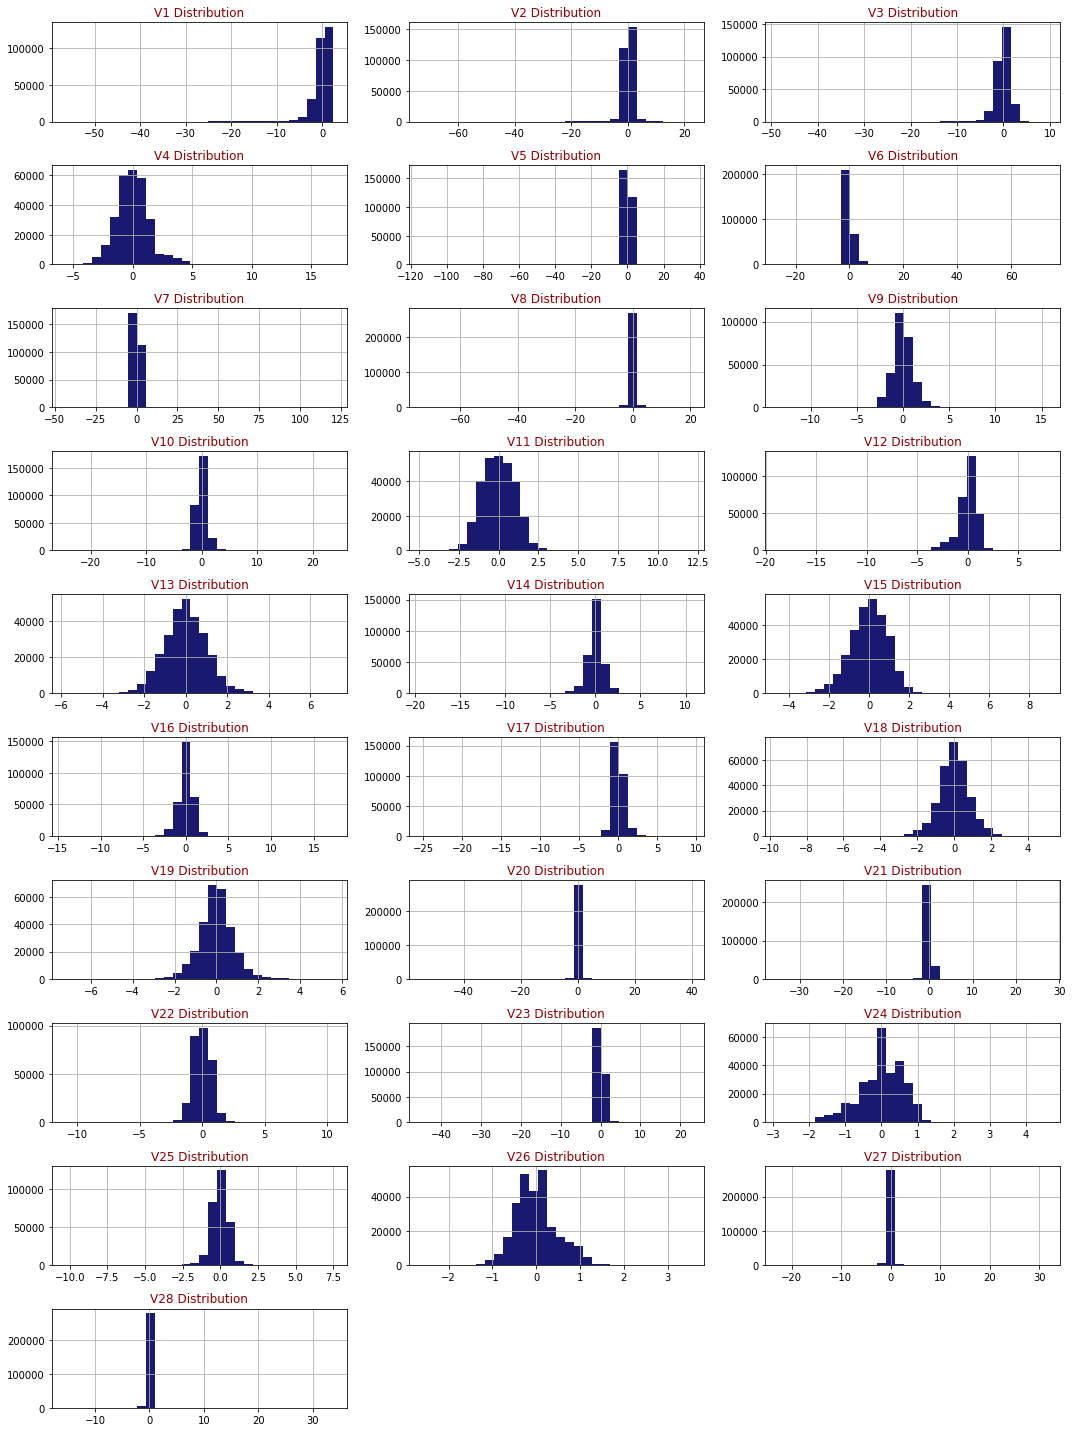

In [20]:
def draw_histograms(dataframe, vcols, rows, cols):
    fig=plt.figure(figsize=(15,20))
    for i, feature in enumerate(vcols):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=30,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df[vcols],vcols,10,3)

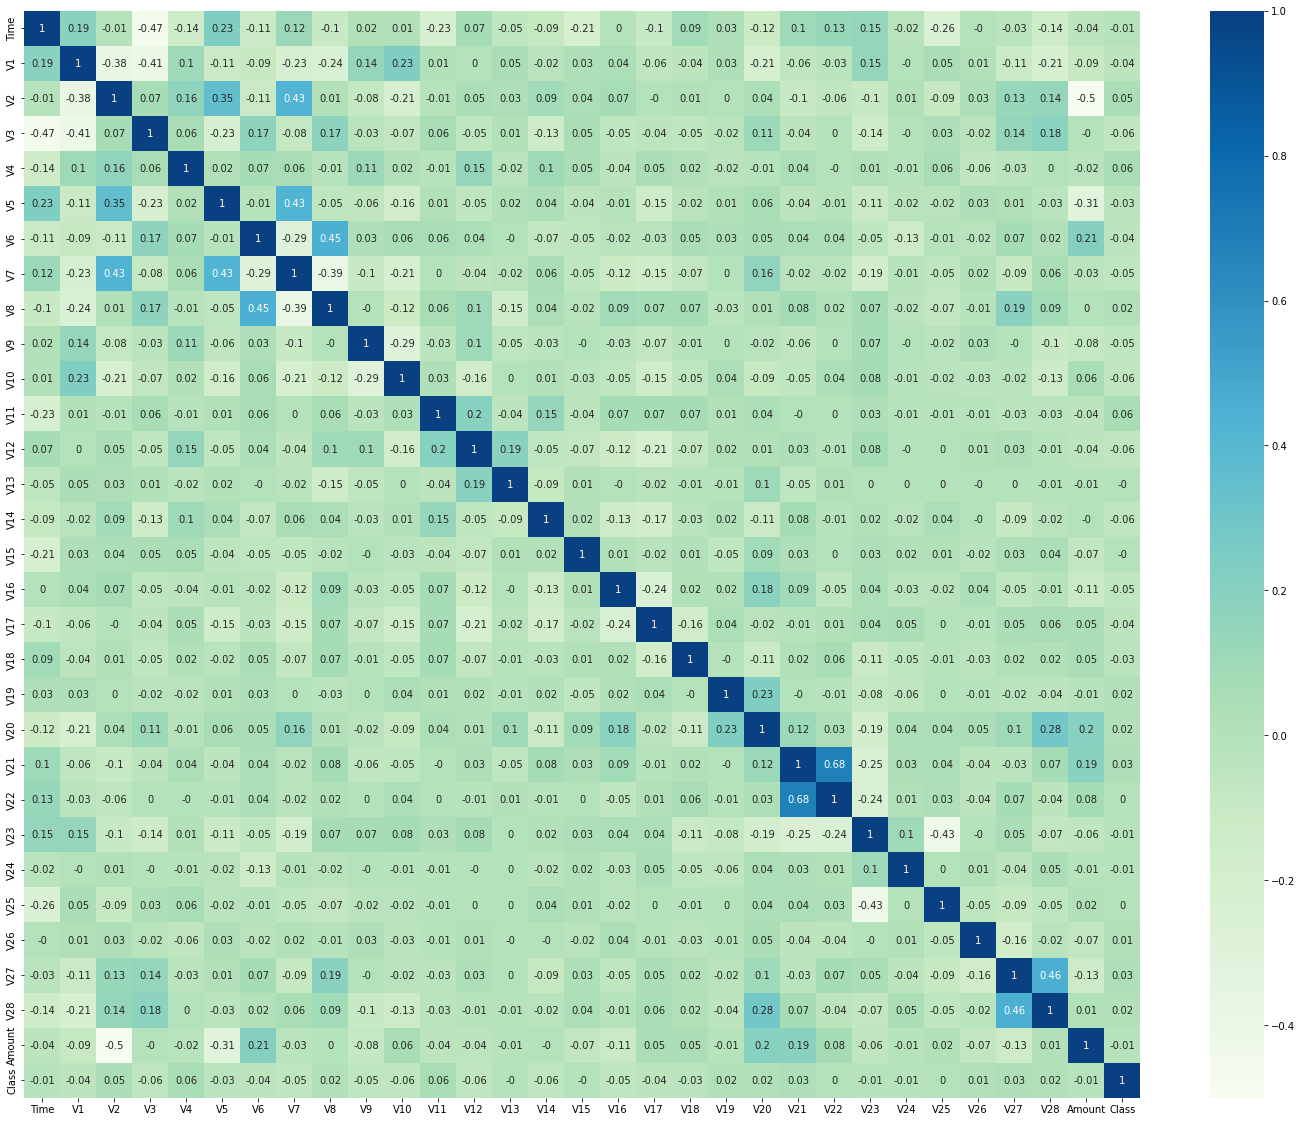

In [21]:
plt.figure(figsize=(25, 20))
sns.heatmap(round(dfc.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

***Data Preprocessing***

In [22]:
# Calculating VIF for checking multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

feature = dfc.drop(['Class'],axis=1).columns

vif = pd.DataFrame()
vif["variables"] = [feature for feature in feature if feature not in []]
vif["VIF"] = [variance_inflation_factor(dfc[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

   variables        VIF
0       Time   2.352783
1         V1   1.624955
2         V2   3.903164
3         V3   1.256154
4         V4   1.141139
5         V5   2.757256
6         V6   1.528109
7         V7   2.504461
8         V8   1.098777
9         V9   1.019334
10       V10   1.114508
11       V11   1.029512
12       V12   1.012571
13       V13   1.003473
14       V14   1.027096
15       V15   1.014514
16       V16   1.000847
17       V17   1.005537
18       V18   1.007009
19       V19   1.038012
20       V20   2.239605
21       V21   1.100434
22       V22   1.083646
23       V23   1.154552
24       V24   1.000682
25       V25   1.013613
26       V26   1.000516
27       V27   1.010059
28       V28   1.001721
29    Amount  11.650240


In [23]:
#scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dfc['scaled_amount'] = scaler.fit_transform(dfc['Amount'].values.reshape(-1,1))
dfc['scaled_time'] = scaler.fit_transform(dfc['Time'].values.reshape(-1,1))

dfc.drop(['Time','Amount'], axis=1, inplace=True)

In [24]:
scaled_amount = dfc['scaled_amount']
scaled_time = dfc['scaled_time']

dfc.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dfc.insert(0, 'scaled_amount', scaled_amount)
dfc.insert(1, 'scaled_time', scaled_time)

In [25]:
dfc.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244200,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342584,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.158900,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.139886,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073813,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [26]:
dfc[dfc['Class']==1]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.353327,-1.988272,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,1.759301,-1.986882,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,0.604864,-1.902848,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-0.117703,-1.849690,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.349333,-1.838465,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.204187,1.565489,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,-0.350292,1.569806,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,-0.042263,1.569891,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,0.625112,1.582843,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


In [27]:
# sub-sample

dfb = dfc.sample(frac=1)

# amount of fraud classes 473 rows.
fraud = dfb.loc[dfb['Class'] == 1]
non_fraud= dfb.loc[dfb['Class'] == 0][:473]

normal_distributed = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
new_df = normal_distributed.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
9179,-0.349333,-1.720375,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,...,1.191444,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1
150697,0.034055,-0.018767,-12.381048,8.213022,-16.962530,7.116091,-9.772826,-3.666836,-16.147363,2.078706,...,0.537795,0.167703,1.503413,-0.767755,0.371951,-1.415639,-0.517022,-0.434621,0.292721,1
202886,-0.113749,0.836607,1.866558,-0.258980,-0.678040,0.952789,0.267894,0.849106,-0.437743,0.190085,...,-0.000369,-0.128613,-0.360631,0.226163,-0.244815,-0.258972,-0.943608,0.049847,-0.024617,0
263324,0.154423,1.391798,-0.848290,2.719882,-6.199070,3.044437,-3.301910,-1.992117,-3.734902,1.520079,...,0.319576,1.125229,0.805258,0.199119,0.035206,0.012159,0.601658,0.137468,-0.171397,1
150677,-0.232280,-0.019631,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,...,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,1


In [28]:
new_df.shape

(946, 31)

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


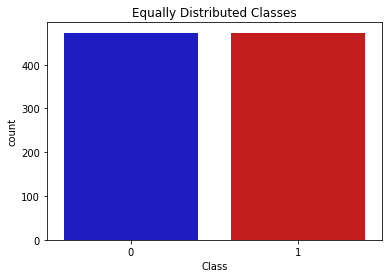

In [29]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=12)
plt.show()

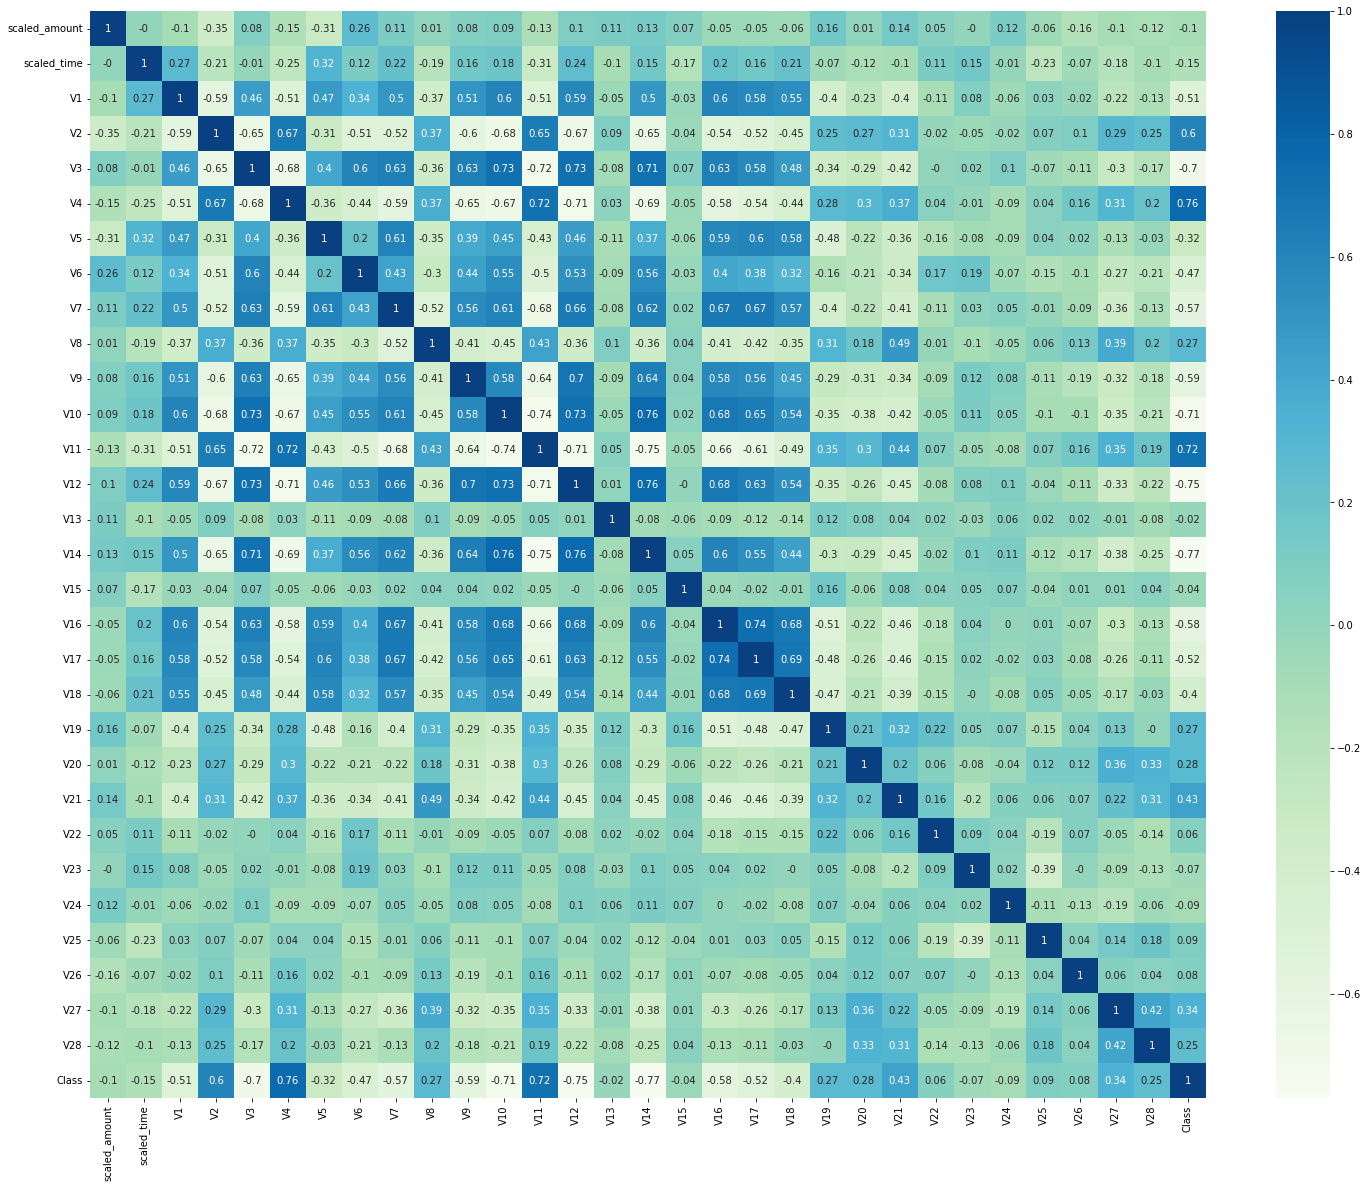

In [30]:
plt.figure(figsize=(25, 20))
sns.heatmap(round(new_df.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

In [31]:
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,...,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,0.109513,-0.142636,-2.221961,1.682987,-3.376480,2.207617,-1.552523,-0.711912,-2.566722,0.516249,...,0.230728,0.227233,0.026952,-0.043399,-0.061860,0.004475,0.015736,0.111689,0.037998,0.500000
std,1.329028,1.026433,5.353611,3.607406,6.027346,3.207636,4.113106,1.687087,5.613057,4.026957,...,1.134532,1.976478,0.968180,1.233527,0.555664,0.684868,0.474081,0.924763,0.427690,0.500264
min,-0.353327,-1.995728,-30.552380,-17.964561,-31.103685,-4.863246,-22.105532,-6.406267,-43.557242,-41.044261,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.294419,-7.263482,-2.962842,0.000000
25%,-0.346178,-1.044720,-2.752126,-0.172745,-4.999725,-0.186501,-1.780269,-1.573831,-2.975441,-0.187096,...,-0.200316,-0.180677,-0.541584,-0.227625,-0.405514,-0.320063,-0.296614,-0.063057,-0.055649,0.000000
50%,-0.279744,-0.290518,-0.715119,0.952855,-1.330860,1.344512,-0.495210,-0.637002,-0.612298,0.176389,...,0.015540,0.126426,-0.023910,-0.034054,-0.006806,0.022353,-0.030263,0.059850,0.034812,0.500000
75%,0.045996,0.841651,1.061392,2.720325,0.367640,4.220067,0.418746,0.109730,0.256604,0.857347,...,0.424581,0.620778,0.566098,0.192069,0.349875,0.387282,0.305499,0.454949,0.219291,1.000000
max,27.532847,1.622859,2.373224,22.057729,2.984823,12.114672,11.095089,11.025540,25.971058,20.007208,...,15.273103,27.202839,8.361985,15.719952,1.195349,3.570877,2.745261,3.052358,1.779364,1.000000


In [33]:
new_df[vcols] = scaler.fit_transform(new_df[vcols])

In [36]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

**Dimensionality Reduction**

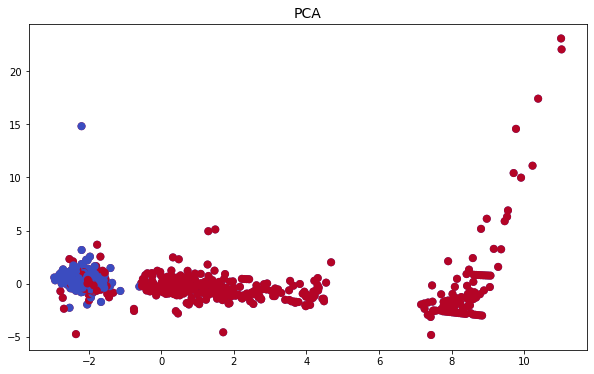

In [44]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# PCA Scatter Plot

f,  ax = plt.subplots(figsize=(10,6))

# labels = ['No Fraud', 'Fraud']

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

**Anomaly Detection**

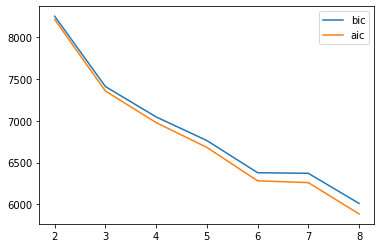

In [47]:
from sklearn.mixture import GaussianMixture

n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='tied').fit(X_reduced_pca)
    bic.append(gm.bic(X_reduced_pca))
    aic.append(gm.aic(X_reduced_pca))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

In [51]:
gmm = GaussianMixture(n_components=8).fit(X)

In [52]:
score=gmm.score_samples(X)

In [64]:
threshold=np.percentile(score,0.01)
threshold

-177.09736730006722

In [65]:
anomalies = X_reduced_pca[score < threshold]

In [66]:
X_reduced_pca = pd.DataFrame(X_reduced_pca)
X_reduced_pca.columns = ['P1', 'P2'] 
X_reduced_pca.head()

,P1,P2
0,7.350011,-1.764761
1,8.412347,0.908072
2,-2.479267,0.318436
3,2.166048,-0.290200
4,8.425563,-0.194916


In [67]:
anomalies = pd.DataFrame(anomalies)
anomalies.columns = ['P1', 'P2'] 
anomalies.head()

,P1,P2
882,1.704774,-4.565288


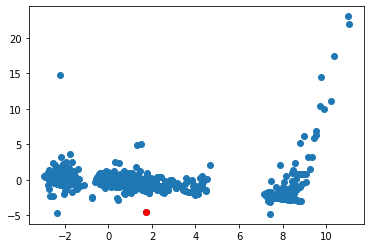

In [68]:
plt.scatter(X_reduced_pca['P1'], X_reduced_pca['P2'])
plt.scatter(anomalies['P1'], anomalies['P2'], color='r')
plt.show()

In [71]:
dfc[vcols] = scaler.fit_transform(dfc[vcols])

In [72]:
dfc.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244200,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0
1,-0.342584,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,0
2,1.158900,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,0
3,0.139886,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0
4,-0.073813,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,0


In [73]:
X = dfc.drop('Class', axis=1)
y = dfc['Class']

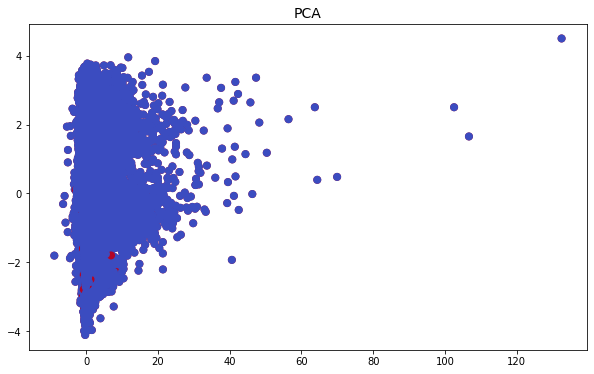

In [74]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# PCA Scatter Plot

f,  ax = plt.subplots(figsize=(10,6))

# labels = ['No Fraud', 'Fraud']

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

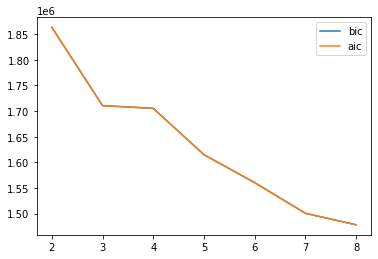

In [76]:
n_gauss=[2,3,4,5,6,7,8]
bic=[]
aic=[]
for g in n_gauss:
    gm=GaussianMixture(n_components=g,covariance_type='tied').fit(X_pca)
    bic.append(gm.bic(X_pca))
    aic.append(gm.aic(X_pca))

plt.plot(n_gauss,bic,label='bic')
plt.plot(n_gauss,aic,label='aic')
plt.legend()

In [77]:
gmm = GaussianMixture(n_components=8).fit(X)
score=gmm.score_samples(X)
threshold=np.percentile(score,0.01)
anomalies = X_pca[score < threshold]

In [78]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2'] 
X_pca.head()

,P1,P2
0,0.405126,-2.522801
1,-0.404946,-2.061197
2,1.866657,-2.498378
3,0.315371,-1.827236
4,-0.012961,-1.473200


In [79]:
anomalies = pd.DataFrame(anomalies)
anomalies.columns = ['P1', 'P2'] 
anomalies.head()

,P1,P2
0,8.379032,-2.284415
1,2.426444,-3.268183
2,-0.180877,-1.060523
3,5.133151,-2.426013
4,-0.373686,-1.039058


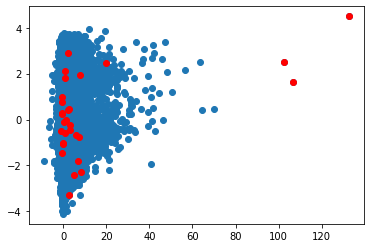

In [81]:
plt.scatter(X_pca['P1'], X_pca['P2'])
plt.scatter(anomalies['P1'], anomalies['P2'], color='r')
plt.show()

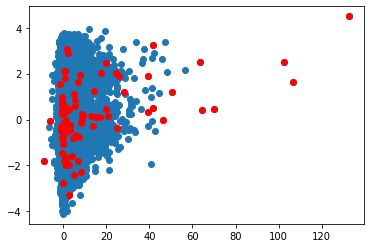

In [84]:
threshold=np.percentile(score,0.03)
anomalies = X_pca[score < threshold]

plt.scatter(X_pca['P1'], X_pca['P2'])
plt.scatter(anomalies['P1'], anomalies['P2'], color='r')
plt.show()


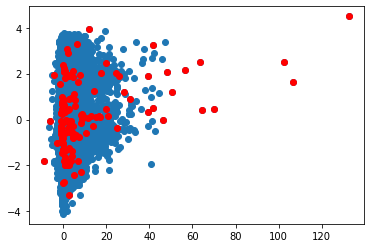

In [85]:
threshold=np.percentile(score,0.05)
anomalies = X_pca[score < threshold]

plt.scatter(X_pca['P1'], X_pca['P2'])
plt.scatter(anomalies['P1'], anomalies['P2'], color='r')
plt.show()

***Model Analysis***


Before using the original dataset to train the model, I tried to create a sub-sample with the intention that the target data is not imbalanced. However, because the amount of data was too small after sub-sampling, I was not satisfied with the results of my model to find outliers or anomalies. 

I use the Gaussian mixture algorithm with the number of components, namely 8. The number of components is obtained using the BIC and AIC values

In addition, several thresholds show different results in detecting anomalies. I think the optimum threshold is 0.05 because it can detect data that is indicated as anomalies.

***Overall Analysis***

This data is imbalanced because the number of fraudulent transactions is still very low when compared to normal transactions, but fraud in transaction activities using credit cards causes considerable losses. Therefore, the purpose of this model is to make predictions about future data and minimize fraudulent transactions